# First we will fit a normal decision tree.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

In [61]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
y = data['target']


In [63]:
from sklearn.model_selection import KFold
# Implement 6-fold cross-validation
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [90]:
# Initialize lists to store results
fold_accuracies_train = []
fold_accuracies_test = []
fold_models = []
fold_results = []

In [91]:
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    print(f"\nFold {fold+1}/{k}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train model (using the best model from your cost complexity pruning)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store results
    fold_accuracies_train.append(train_acc)
    fold_accuracies_test.append(test_acc)
    fold_models.append(clf)
    
    # Create confusion matrix for this fold
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    

    print(f"\nDetailed results for Fold {fold+1}/{k}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    
    print("\nTrain Confusion Matrix:")
    print(train_cm)
    
    print("\nTest Confusion Matrix:")
    print(test_cm)
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, target_names=['malignant', 'benign']))
    
    # Store detailed fold result
    fold_results.append({
        'fold': fold+1,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'train_cm': train_cm,
        'test_cm': test_cm,
        'train': [X.iloc[train_idx], X.iloc[test_idx]],
        'test': [y[train_idx], y[test_idx]]
    })



Fold 1/6

Detailed results for Fold 1/6
Train accuracy: 1.0000
Test accuracy: 0.9158

Train Confusion Matrix:
[[178   0]
 [  0 296]]

Test Confusion Matrix:
[[29  5]
 [ 3 58]]

Classification Report (Test Set):
              precision    recall  f1-score   support

   malignant       0.91      0.85      0.88        34
      benign       0.92      0.95      0.94        61

    accuracy                           0.92        95
   macro avg       0.91      0.90      0.91        95
weighted avg       0.92      0.92      0.92        95


Fold 2/6

Detailed results for Fold 2/6
Train accuracy: 1.0000
Test accuracy: 0.9579

Train Confusion Matrix:
[[178   0]
 [  0 296]]

Test Confusion Matrix:
[[32  2]
 [ 2 59]]

Classification Report (Test Set):
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        34
      benign       0.97      0.97      0.97        61

    accuracy                           0.96        95
   macro avg       0.95      0.

In [92]:
best_fold_idx = np.argmax(fold_accuracies_test)
fold_results

[{'fold': 1,
  'train_acc': 1.0,
  'test_acc': 0.9157894736842105,
  'train_cm': array([[178,   0],
         [  0, 296]], dtype=int64),
  'test_cm': array([[29,  5],
         [ 3, 58]], dtype=int64),
  'train': [     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
   0          17.99         10.38          122.80     1001.0          0.11840   
   1          20.57         17.77          132.90     1326.0          0.08474   
   3          11.42         20.38           77.58      386.1          0.14250   
   4          20.29         14.34          135.10     1297.0          0.10030   
   5          12.45         15.70           82.57      477.1          0.12780   
   ..           ...           ...             ...        ...              ...   
   562        15.22         30.62          103.40      716.9          0.10480   
   563        20.92         25.09          143.00     1347.0          0.10990   
   565        20.13         28.25          131.20     1261.0  

In [93]:
fold_results[best_fold_idx]

{'fold': 2,
 'train_acc': 1.0,
 'test_acc': 0.9578947368421052,
 'train_cm': array([[178,   0],
        [  0, 296]], dtype=int64),
 'test_cm': array([[32,  2],
        [ 2, 59]], dtype=int64),
 'train': [     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
  1          20.57         17.77          132.90     1326.0          0.08474   
  2          19.69         21.25          130.00     1203.0          0.10960   
  3          11.42         20.38           77.58      386.1          0.14250   
  4          20.29         14.34          135.10     1297.0          0.10030   
  5          12.45         15.70           82.57      477.1          0.12780   
  ..           ...           ...             ...        ...              ...   
  561        11.20         29.37           70.67      386.0          0.07449   
  563        20.92         25.09          143.00     1347.0          0.10990   
  564        21.56         22.39          142.00     1479.0          0.11100  

In [95]:
import numpy as np
# Find best model
best_fold_idx = np.argmax(fold_accuracies_test)
best_model = fold_models[best_fold_idx]
print(f"\nBest model is from fold {best_fold_idx+1} with test accuracy: {fold_accuracies_test[best_fold_idx]:.4f}")


X_train, X_test = fold_results[best_fold_idx]['train']
y_train, y_test = fold_results[best_fold_idx]['test']


Best model is from fold 2 with test accuracy: 0.9579


In [96]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [97]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [98]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1])

In [99]:
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9473684210526315

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[32,  2],
       [ 3, 58]], dtype=int64)

In [102]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.9666666666666667

In [103]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9508196721311475

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.91      0.94      0.93        34
      benign       0.97      0.95      0.96        61

    accuracy                           0.95        95
   macro avg       0.94      0.95      0.94        95
weighted avg       0.95      0.95      0.95        95



In [105]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

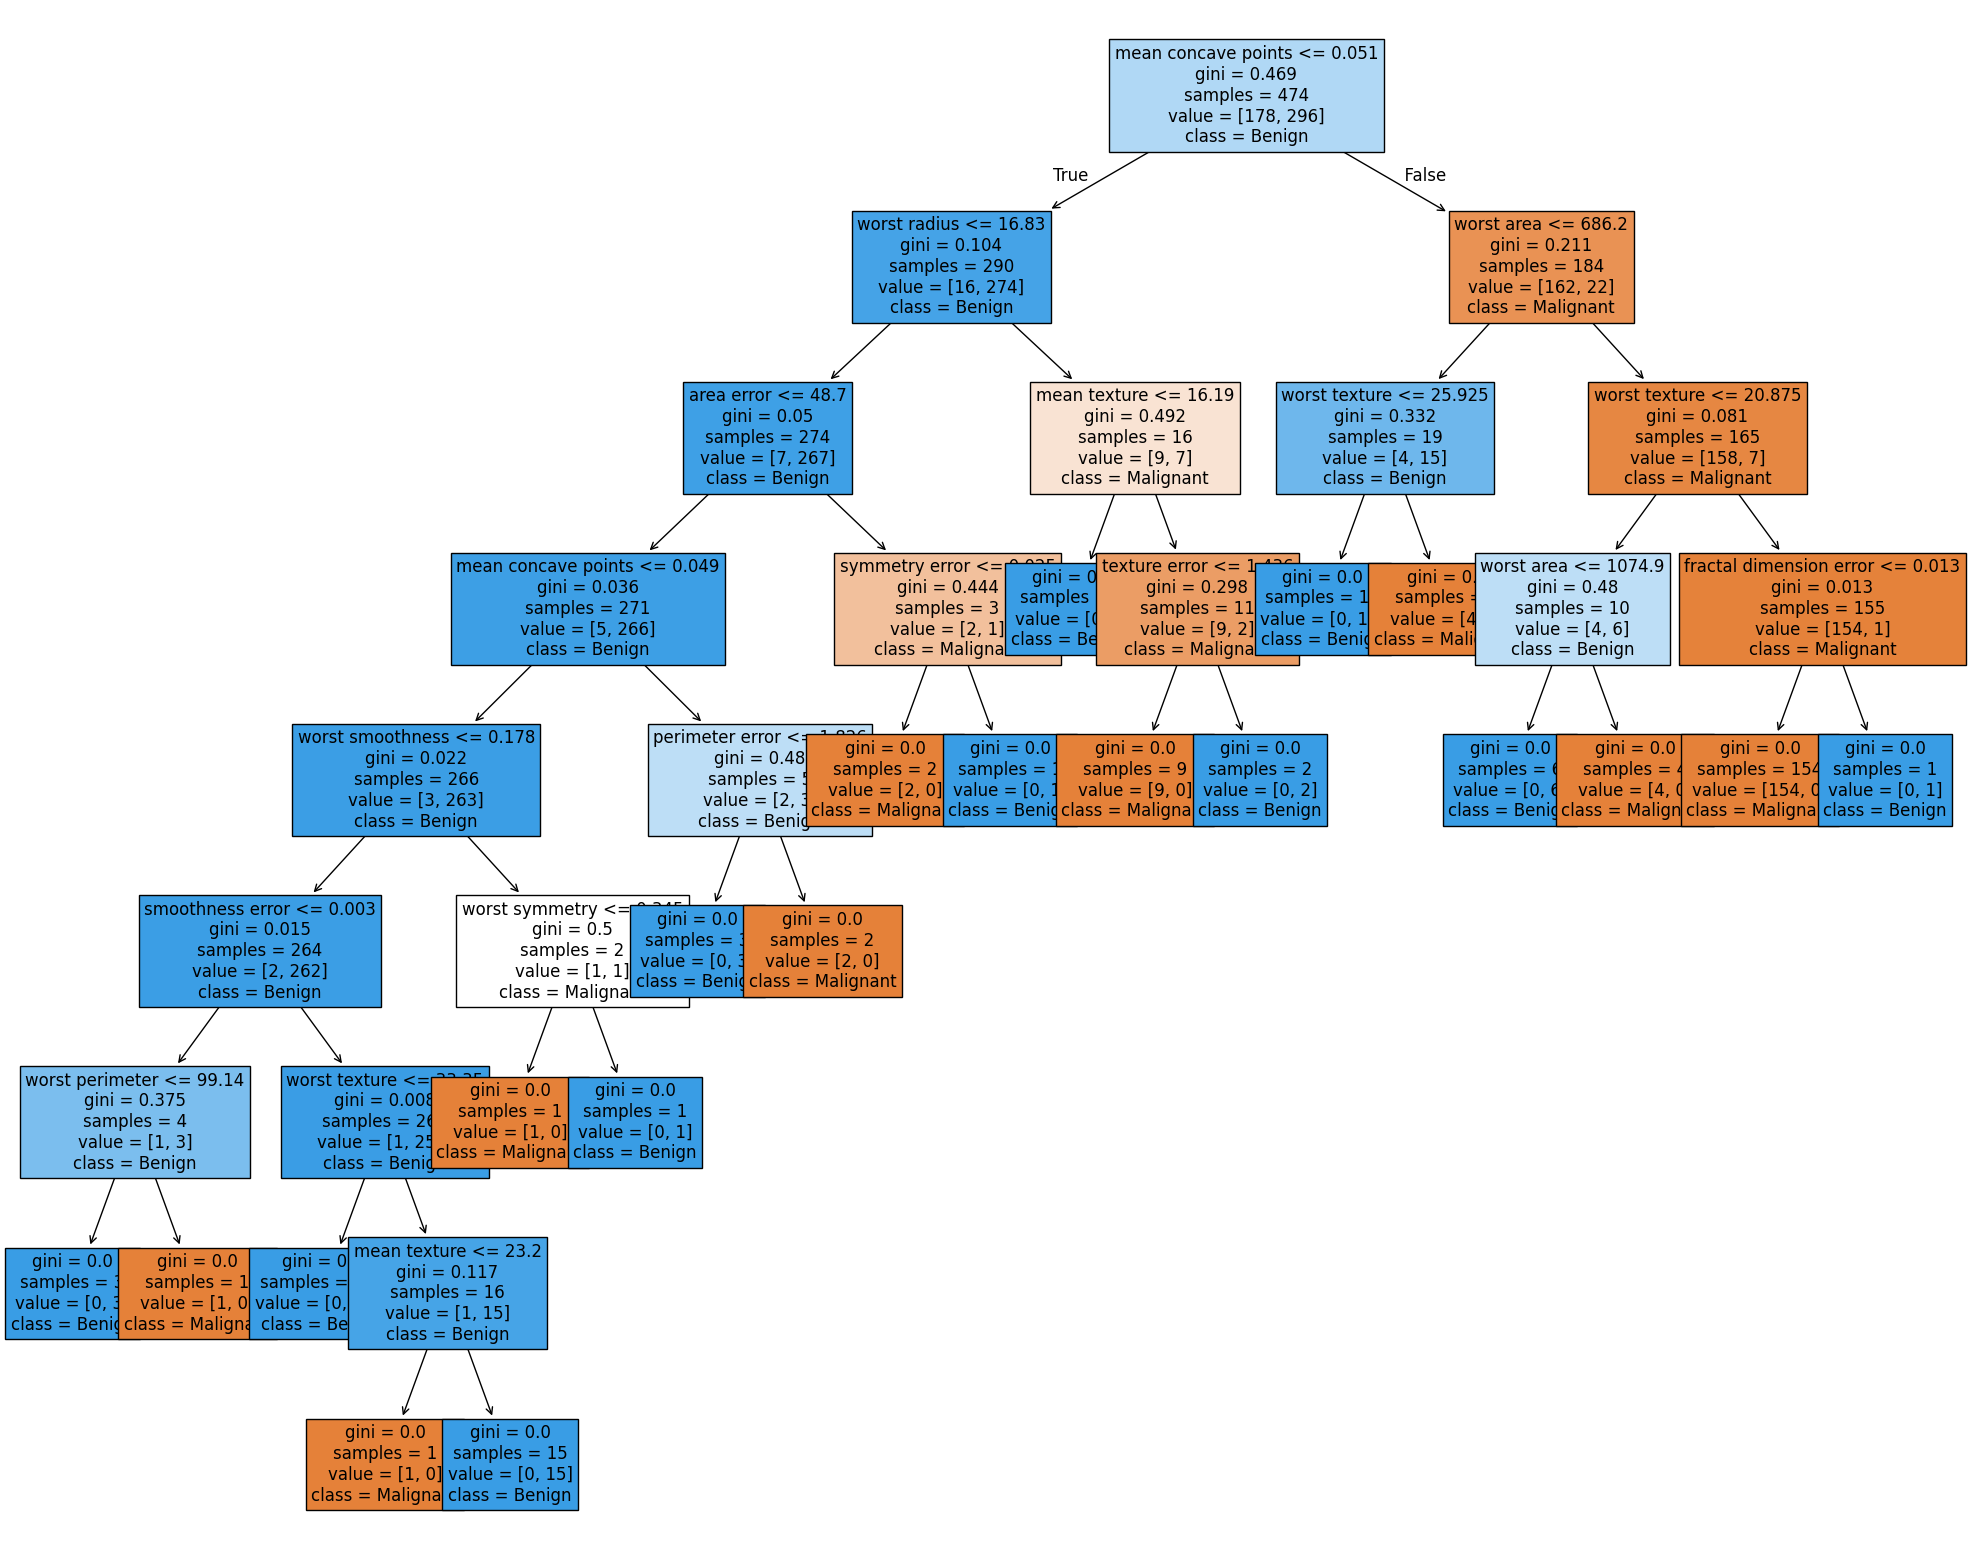

In [106]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

## 1. Pre pruning technique
Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like *max_depth* , *min_samples* etc. 

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters
* max_depth: maximum depth of decision tree
* min_sample_split: The minimum number of samples required to split an internal node:
* min_samples_leaf: The minimum number of samples required to be at a leaf node

In [107]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [108]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(confusion_matrix(y_train_pred,y_train, labels=[0,1]))
print(confusion_matrix(y_test_pred,y_test, labels=[0,1]))


Train score 0.9873417721518988
Test score 0.9578947368421052
[[173   1]
 [  5 295]]
[[31  1]
 [ 3 60]]


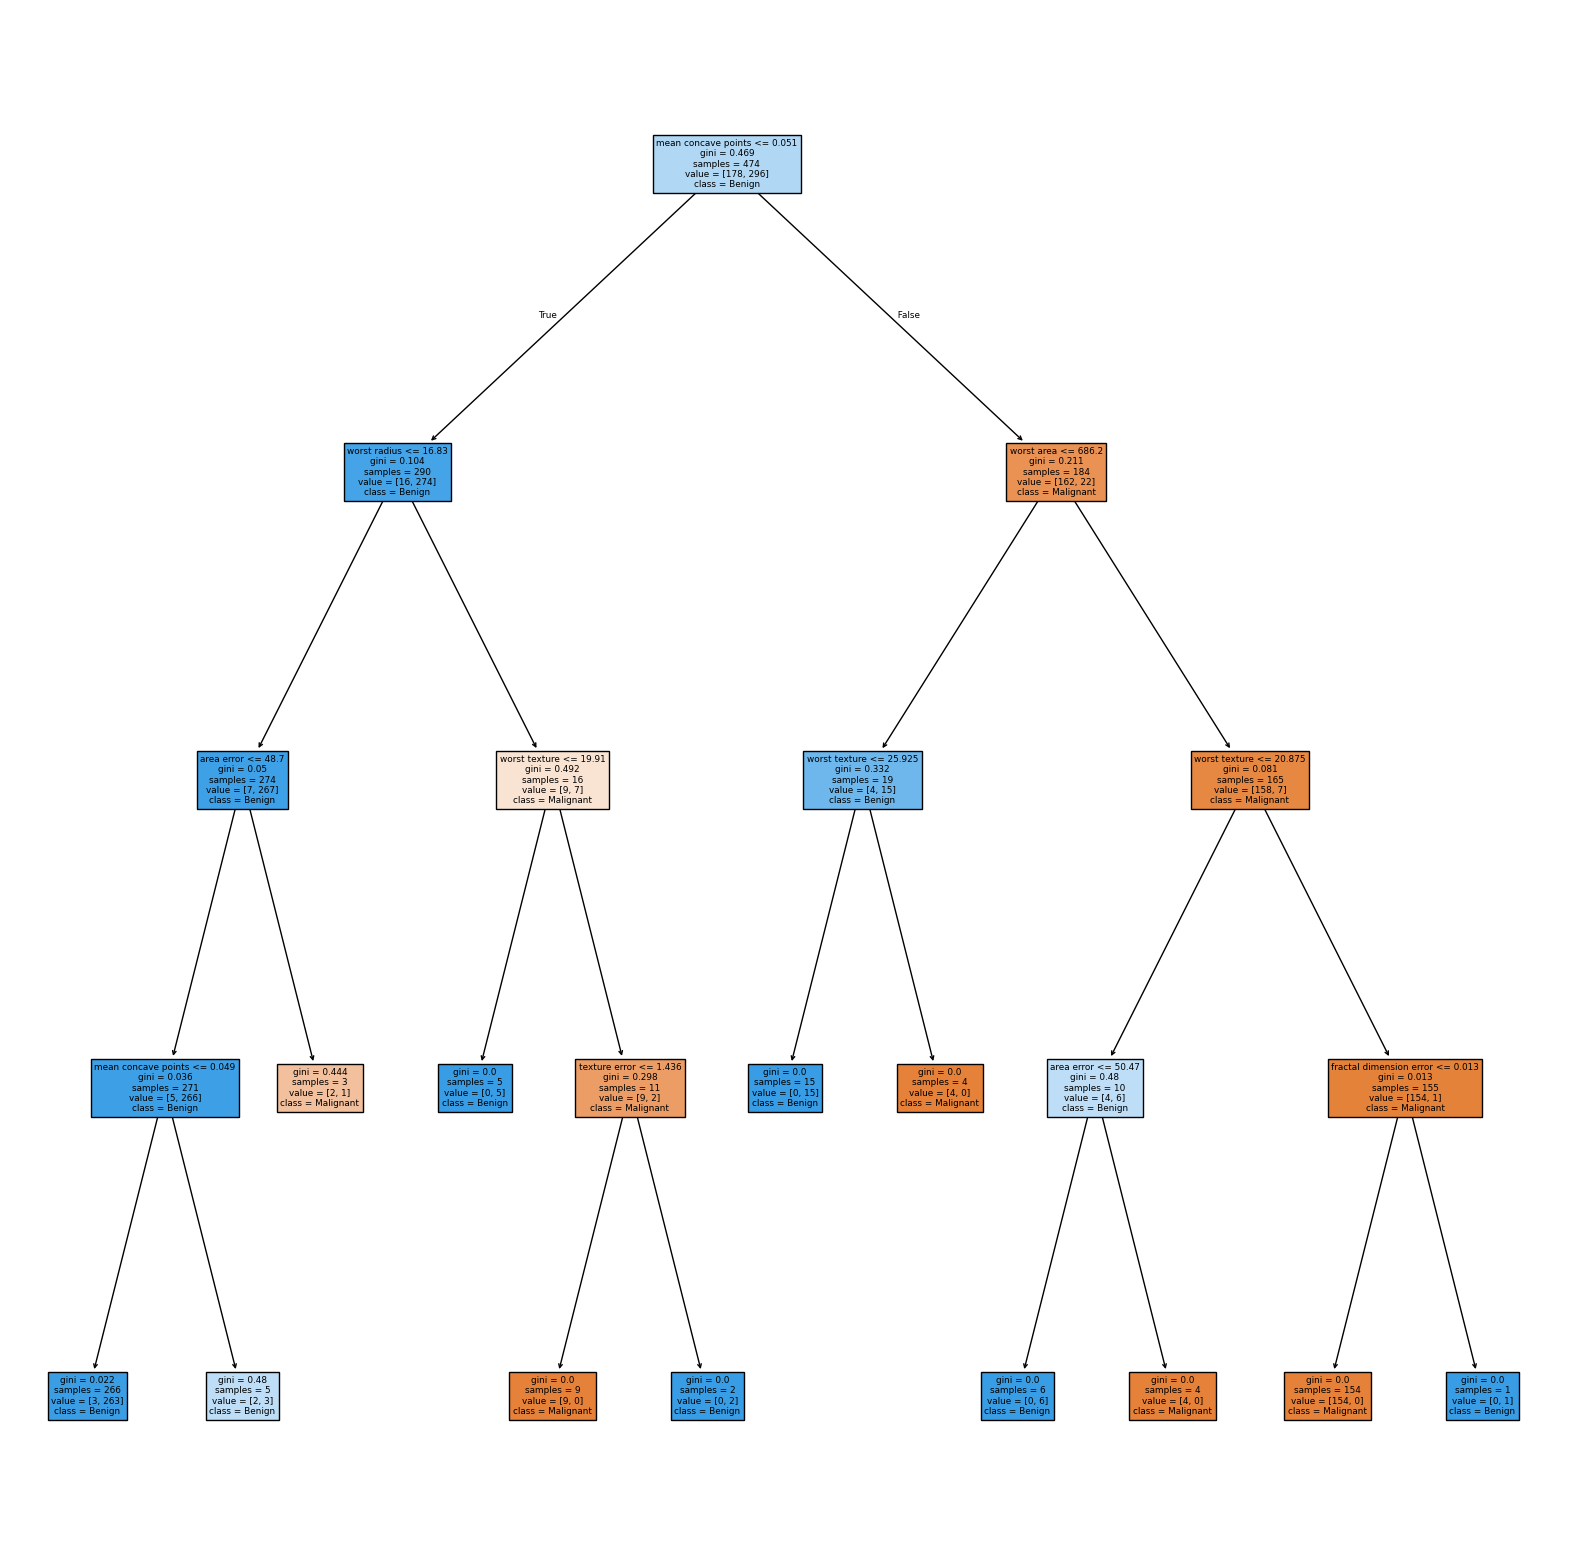

In [109]:
plt.figure(figsize=(20,20))
classes = ["Malignant","Benign"]
tree.plot_tree(model,feature_names=feature_names,class_names=classes,filled=True)
plt.show()

## 2. Post pruning techniques

There are several post pruning techniques. Cost complexity pruning is one of the important among them.

## Cost Complexity Pruning


Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like *max_depth* , *min_samples* etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for **alpha**.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [110]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00208591 0.00281294 0.00409617 0.00419219 0.00526056
 0.00690449 0.00970944 0.01012658 0.01332445 0.01396406 0.01839061
 0.04012084 0.3234992 ]


In [111]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

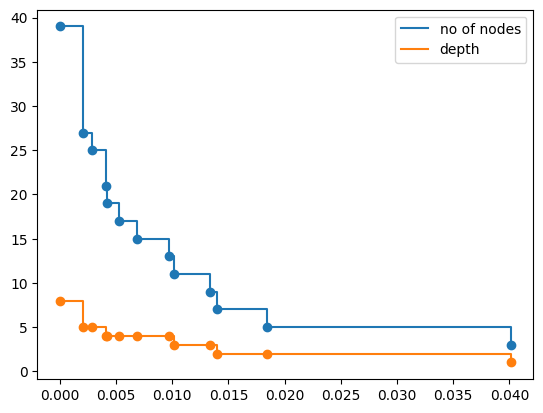

In [112]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

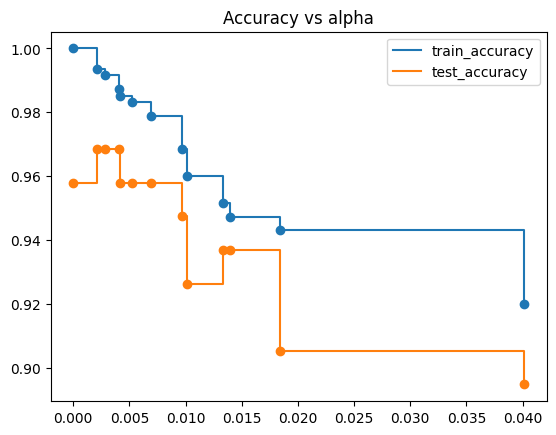

In [113]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.0167979

In [115]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0167979)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(confusion_matrix(y_train_pred,y_train))
print(confusion_matrix(y_test_pred,y_test))

Train score 0.9472573839662447
Test score 0.9368421052631579
[[167  14]
 [ 11 282]]
[[34  6]
 [ 0 55]]


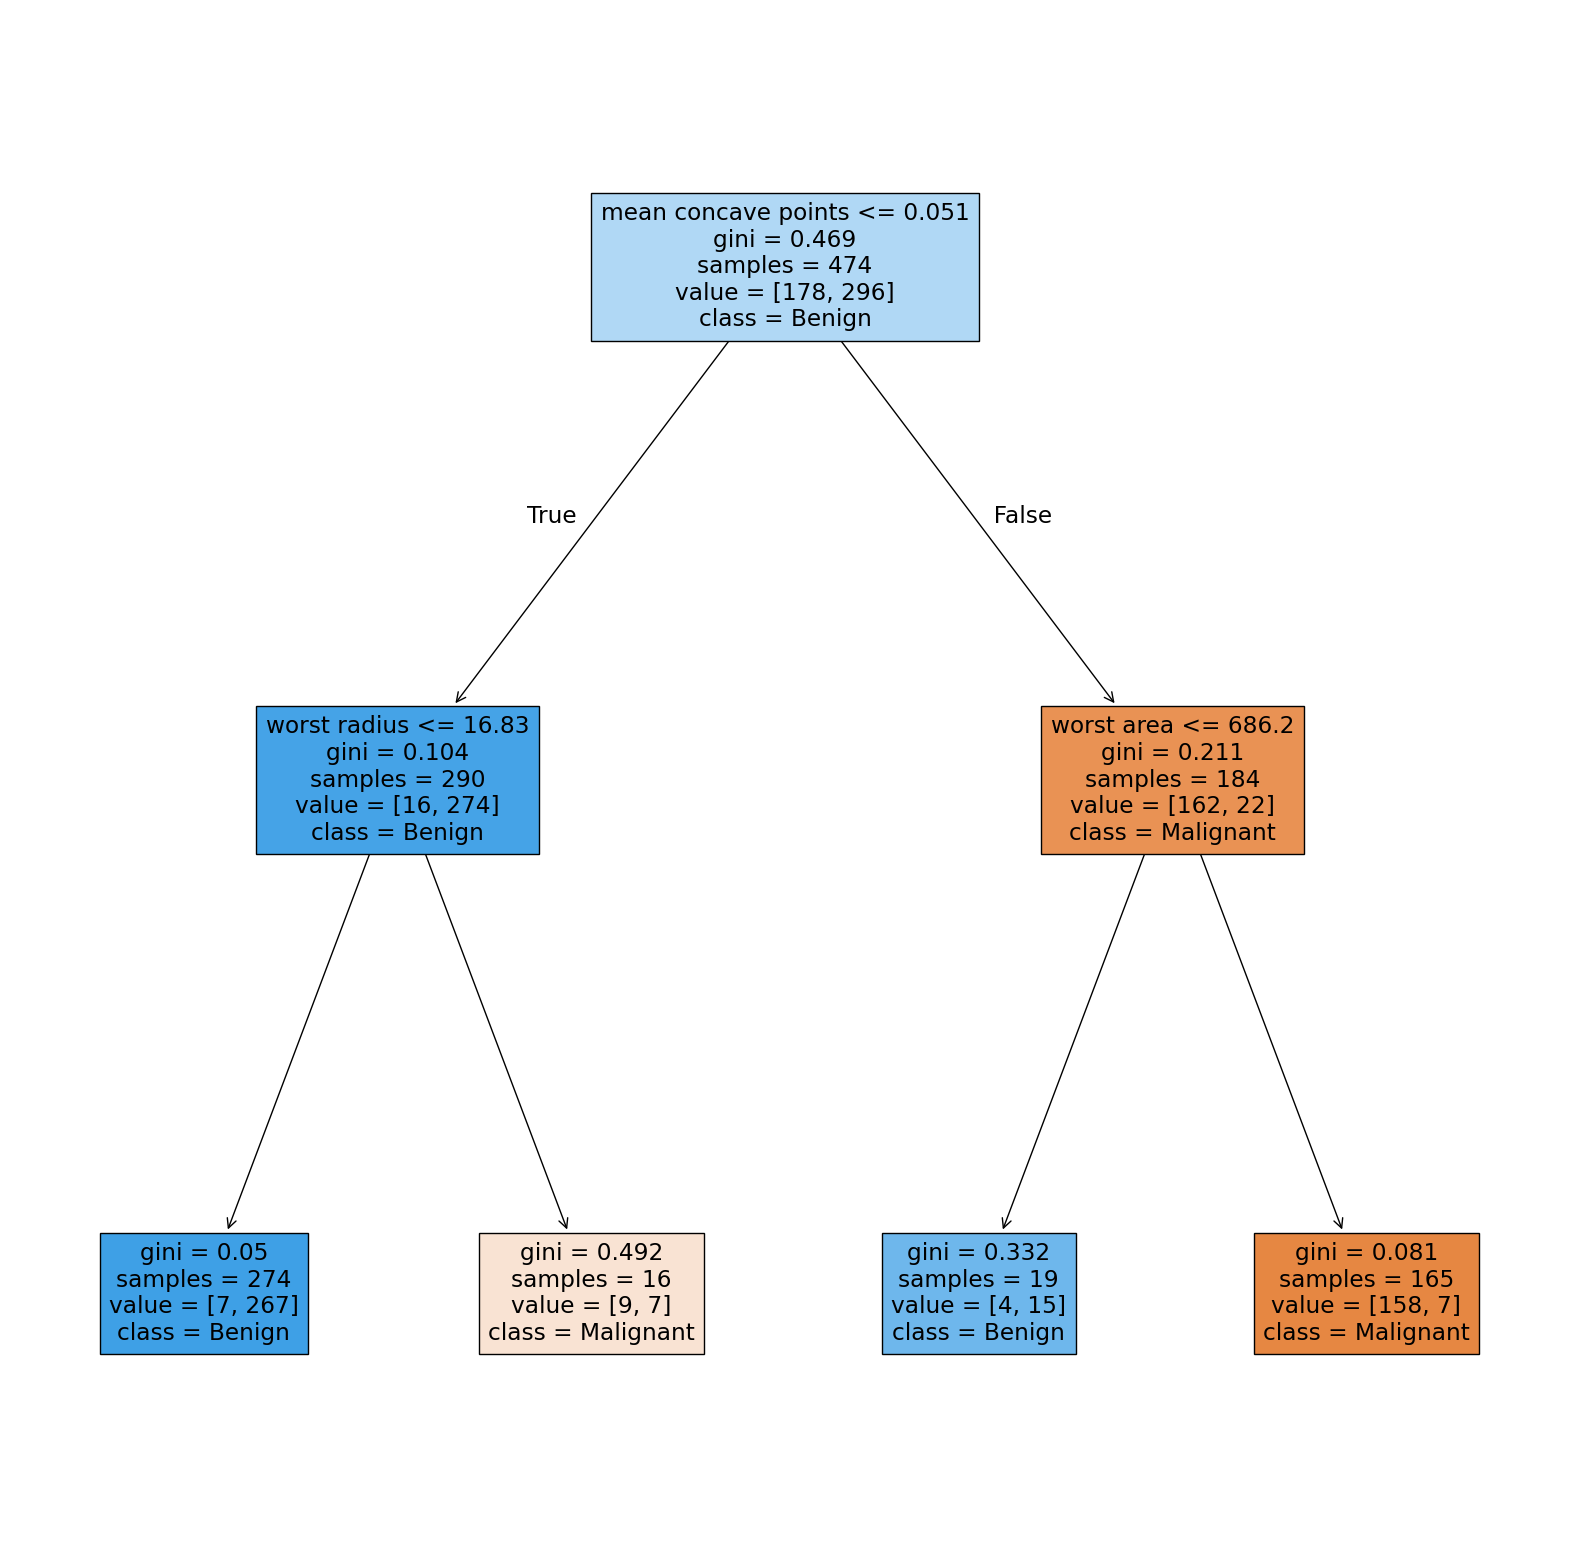

In [116]:
plt.figure(figsize=(20,20))
classes = ["Malignant","Benign"]
tree.plot_tree(clf_,feature_names=feature_names,class_names=classes,filled=True)
plt.show()